In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import sys

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# loading the downloaded csv file with raw match data from https://www.football-data.co.uk
df_season_1=pd.read_csv('21-22pl.csv') # First Division This Season
df_season_2 = pd.read_csv('20-21PL.csv') # First Division Last Season
df_season_2_second =pd.read_csv('20-21CH.csv') # Second Division Last Season

## Data Exploration & Preparation

In [3]:
df_season_1.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [4]:
df_season_2.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [5]:
# including games from the second divison for Premier League newcomers, to have enough data for averages calculation
df_norwich_home= df_season_2_second[df_season_2_second['HomeTeam']=='Norwich']
df_brentford_home= df_season_2_second[df_season_2_second['HomeTeam']=='Brentford']
df_watford_home = df_season_2_second[df_season_2_second['HomeTeam']=='Watford']
df_norwich_away= df_season_2_second[df_season_2_second['AwayTeam']=='Norwich']
df_brentford_away = df_season_2_second[df_season_2_second['AwayTeam']=='Brentford']
df_watford_away = df_season_2_second[df_season_2_second['AwayTeam']=='Watford']
df_season_2_second = pd.concat([df_norwich_home, df_norwich_away, df_brentford_home, df_brentford_away, df_watford_home, df_watford_away], axis=0)

In [6]:
df_season_2= pd.concat([df_season_2,df_season_2_second], axis=0)

In [7]:
teams_s1 = df_season_1.columns.unique()

In [8]:
teams_s1.shape

(106,)

In [9]:
teams_s2 = df_season_2.columns.unique()



In [10]:
teams_s2.shape

(106,)

In [11]:
same_columns = np.intersect1d(teams_s1, teams_s2)

In [12]:
df_season_1 = df_season_1[same_columns]
df_season_2 = df_season_2[same_columns]

In [13]:
df_both_seasons = pd.concat([df_season_1, df_season_2], axis=0)

In [14]:
df_both_seasons['Date'] = pd.to_datetime(df_both_seasons['Date'], errors='coerce')

In [15]:
df_both_seasons['Day'] = df_both_seasons['Date'].dt.day
df_both_seasons['Month'] = df_both_seasons['Date'].dt.month
df_both_seasons['Year'] = df_both_seasons['Date'].dt.year

In [16]:
df_both_seasons_essentials = df_both_seasons[['Day','Month','Year','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST']]

In [17]:
#creating columns with away / home team goal differences
df_both_seasons_essentials['HTGDIFF'] = df_both_seasons_essentials['FTHG'] - df_both_seasons_essentials['FTAG']
df_both_seasons_essentials['ATGDIFF'] = df_both_seasons_essentials['FTAG'] - df_both_seasons_essentials['FTHG']

In [18]:
df_both_seasons_essentials.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
0,13,8,2021,Brentford,Arsenal,2,0,3,4,2,-2
1,14,8,2021,Man United,Leeds,5,1,8,3,4,-4
2,14,8,2021,Burnley,Brighton,1,2,3,8,-1,1
3,14,8,2021,Chelsea,Crystal Palace,3,0,6,1,3,-3
4,14,8,2021,Everton,Southampton,3,1,6,3,2,-2


In [19]:
df_both_seasons_essentials= df_both_seasons_essentials.sort_values(['Year', 'Month','Day'], ascending=False)

In [20]:
# Counts the amount of home + away games every team had during the first division
# (Premier League) for the current and last season
df_both_seasons_essentials.groupby('HomeTeam').count()

,Day,Month,Year,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
HomeTeam,,,,,,,,,,
Arsenal,35,35,35,35,35,35,35,35,35,35
Aston Villa,34,34,34,34,34,34,34,34,34,34
Barnsley,3,3,3,3,3,3,3,3,3,3
Birmingham,3,3,3,3,3,3,3,3,3,3
Blackburn,3,3,3,3,3,3,3,3,3,3
Bournemouth,3,3,3,3,3,3,3,3,3,3
Brentford,41,41,41,41,41,41,41,41,41,41
Brighton,35,35,35,35,35,35,35,35,35,35
Bristol City,3,3,3,3,3,3,3,3,3,3


In [21]:
from pandas.plotting import scatter_matrix

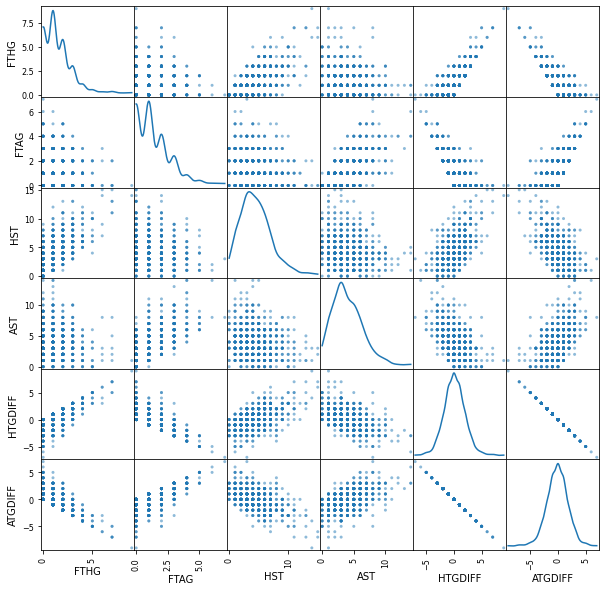

In [22]:
scatter_matrix(df_both_seasons_essentials[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST', 'HTGDIFF', 'ATGDIFF']], diagonal='kde', figsize=(10,10));

In [23]:
df_both_seasons_essentials[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST', 'HTGDIFF', 'ATGDIFF']].describe()

,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,1.397823,1.275695,4.493349,3.993954,0.122128,-0.122128
std,1.314897,1.228762,2.585748,2.399801,1.894514,1.894514
min,0.000000,0.000000,0.000000,0.000000,-7.000000,-9.000000
25%,0.000000,0.000000,3.000000,2.000000,-1.000000,-1.000000
50%,1.000000,1.000000,4.000000,4.000000,0.000000,0.000000
75%,2.000000,2.000000,6.000000,5.000000,1.000000,1.000000
max,9.000000,7.000000,15.000000,14.000000,9.000000,7.000000


In [24]:
# saves the result locally as a pickle file
import pickle
df_both_seasons_essentials.to_pickle('df_both_seasons_essentials')
df_both_seasons_essentials.to_pickle('df_both_seasons_essentials2')

In [29]:
# All code chunks tested and run smooth